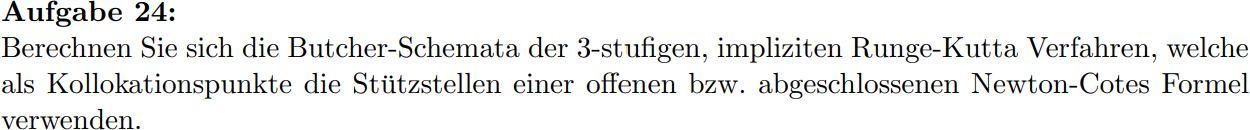

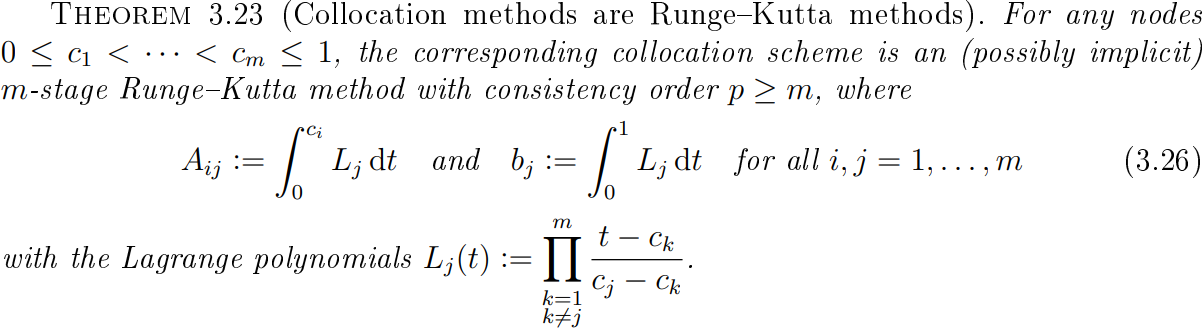

In [4]:
import sympy as sp
import numpy as np
from fractions import Fraction

In [5]:
def L(j, t, c):

    """
        returns j-th lagrange basis polynomial at t via nodes c
        
    """

    m = len(c)
    dummy = 1

    for k in range(m):
        if k != j:
            dummy *= (t - c[k])/(c[j] - c[k])

    return dummy

def apply_theorem(c):

    """
        applies theorem 3.23 (Collocation methods are RUnge-Kutta methods)
    """
    m = len(c)
    t = sp.Symbol('t')

    A = []

    for i in range(m):

        A_i = []

        for j in range(m):

            A_ij = sp.integrate(L(j, t, c), (t, 0, c[i]))
            A_i += [float(A_ij)]

            A += [A_i]

    b = []

    for j in range(m):

        b_j = sp.integrate(L(j, t, c), (t, 0, 1))
        b += [float(b_j)]

    c = np.array(c)
    A = np.array(A)
    b = np.array(b)

    return c, A, b

def show_results(c, decimals):

    """
        applies theorem 3.23 and shows the results with style
    """

    c, A, b = apply_theorem(c)

    c_new = []

    for i in range(len(c)):
        c_new += [str(Fraction(c[i]).limit_denominator(decimals))]

    c_new = np.array(c_new)
    
    A_new = []
    
    for i in range(np.shape(A)[0]):
        A_i_new = []
        for j in range(np.shape(A)[1]):
            A_i_new += [str(Fraction(A[i][j]).limit_denominator(decimals))]
        A_new += [A_i_new]

    A_new = np.array(A_new)

    b_new = []

    for i in range(len(b)):
        b_new += [str(Fraction(b[i]).limit_denominator(decimals))]

    b_new = np.array(b_new)

    print('c =')
    print(c_new)
    print('')

    print('A =')
    print(A_new)
    print('')

    print('b =')
    print(b_new)
    print('')

In [6]:
decimals = 1000

print("#", "-"*64, "#", '\n')

c = np.array([1/4, 2/4, 3/4])
show_results(c, decimals)

print("#", "-"*64, "#", '\n')

c = np.array([0, 1/2, 1])
show_results(c, decimals)

print("#", "-"*64, "#", '\n')

# ---------------------------------------------------------------- # 

c =
['1/4' '1/2' '3/4']

A =
[['23/48' '-1/3' '5/48']
 ['23/48' '-1/3' '5/48']
 ['23/48' '-1/3' '5/48']
 ['7/12' '-1/6' '1/12']
 ['7/12' '-1/6' '1/12']
 ['7/12' '-1/6' '1/12']
 ['9/16' '0' '3/16']
 ['9/16' '0' '3/16']
 ['9/16' '0' '3/16']]

b =
['2/3' '-1/3' '2/3']

# ---------------------------------------------------------------- # 

c =
['0' '1/2' '1']

A =
[['0' '0' '0']
 ['0' '0' '0']
 ['0' '0' '0']
 ['5/24' '1/3' '-1/24']
 ['5/24' '1/3' '-1/24']
 ['5/24' '1/3' '-1/24']
 ['1/6' '2/3' '1/6']
 ['1/6' '2/3' '1/6']
 ['1/6' '2/3' '1/6']]

b =
['1/6' '2/3' '1/6']

# ---------------------------------------------------------------- # 

